In [262]:
# Baseline PSNR result
# for denoise 15, 25, 50
baseline_denoise15_path = "/home/jiachen/PromptIR/output_promptir/denoise/15/denoise15_psnr_dict.json"
baseline_denoise25_path = "/home/jiachen/PromptIR/output_promptir/denoise/25/denoise25_psnr_dict.json"
baseline_denoise50_path = "/home/jiachen/PromptIR/output_promptir/denoise/50/denoise50_psnr_dict.json"

baseline_derain_path = "/home/jiachen/PromptIR/output_promptir/derain/derain_psnr_dict.json"

baseline_dehaze_path = "/home/jiachen/PromptIR/output_promptir/dehaze/dehaze_psnr_dict.json"


In [263]:
# Ours PSNR result

promptxrestormer_denoise15_path = "/home/jiachen/PromptIR/output_promptxrestormer_epoch64/denoise/15/denoise15_psnr_dict.json"
promptxrestormer_denoise25_path = "/home/jiachen/PromptIR/output_promptxrestormer_epoch64/denoise/25/denoise25_psnr_dict.json"
promptxrestormer_denoise50_path = "/home/jiachen/PromptIR/output_promptxrestormer_epoch64/denoise/50/denoise50_psnr_dict.json"

promptxrestormer_derain_path = "/home/jiachen/PromptIR/output_promptxrestormer_epoch64/derain/derain_psnr_dict.json"

promptxrestormer_dehaze_path = "/home/jiachen/PromptIR/output_promptxrestormer_epoch64/dehaze/dehaze_psnr_dict.json"

In [264]:
# load the json file of the path and get the dictionary
import json
def load_json_file(path):
    with open(path, "r") as f:
        return json.load(f)
    
baseline_denoise15_psnr_dict = load_json_file(baseline_denoise15_path)
baseline_denoise25_psnr_dict = load_json_file(baseline_denoise25_path)  
baseline_denoise50_psnr_dict = load_json_file(baseline_denoise50_path)

baseline_derain_psnr_dict = load_json_file(baseline_derain_path)

baseline_dehaze_psnr_dict = load_json_file(baseline_dehaze_path)

In [265]:
promptxrestormer_denoise15_psnr_dict = load_json_file(promptxrestormer_denoise15_path)
promptxrestormer_denoise25_psnr_dict = load_json_file(promptxrestormer_denoise25_path)
promptxrestormer_denoise50_psnr_dict = load_json_file(promptxrestormer_denoise50_path)

promptxrestormer_derain_psnr_dict = load_json_file(promptxrestormer_derain_path)

promptxrestormer_dehaze_psnr_dict = load_json_file(promptxrestormer_dehaze_path)

In [266]:
# get the pronptxrestormer psnr minus baseline psnr, then sort the result and get the max difference 10 images names
def get_max_difference(promptxrestormer_psnr_dict, baseline_psnr_dict):
    max_difference = {}
    for key in promptxrestormer_psnr_dict:
        max_difference[key] = promptxrestormer_psnr_dict[key] - baseline_psnr_dict[key]
    return dict(sorted(max_difference.items(), key=lambda x: x[1], reverse=True)[:10])

max_difference_denoise15 = get_max_difference(promptxrestormer_denoise15_psnr_dict, baseline_denoise15_psnr_dict)
print("max_difference_denoise15: ", max_difference_denoise15)
max_difference_denoise25 = get_max_difference(promptxrestormer_denoise25_psnr_dict, baseline_denoise25_psnr_dict)
print("max_difference_denoise25: ", max_difference_denoise25)
max_difference_denoise50 = get_max_difference(promptxrestormer_denoise50_psnr_dict, baseline_denoise50_psnr_dict)
print("max_difference_denoise50: ", max_difference_denoise50)

max_difference_derain = get_max_difference(promptxrestormer_derain_psnr_dict, baseline_derain_psnr_dict)
print("max_difference_derain: ", max_difference_derain)

max_difference_dehaze = get_max_difference(promptxrestormer_dehaze_psnr_dict, baseline_dehaze_psnr_dict)
print("max_difference_dehaze: ", max_difference_dehaze)

max_difference_denoise15:  {'0046': 0.2605358044149355, '0022': 0.2602891816153772, '0006': 0.24170842518672941, '0018': 0.23035966371864447, '0025': 0.21134813321558, '0042': 0.2071650799332403, '0026': 0.20170716223724838, '0028': 0.2005171927793299, '0029': 0.1949616687682223, '0041': 0.19496077506605047}
max_difference_denoise25:  {'0022': 0.27542010204624745, '0046': 0.26933286011481883, '0018': 0.23107372617023714, '0006': 0.22229747599802963, '0025': 0.21303416439913292, '0028': 0.19908881563823044, '0026': 0.18998842722596265, '0052': 0.1847636025200039, '0041': 0.18303012292243181, '0029': 0.1790577024149158}
max_difference_denoise50:  {'0063': 0.2657042737155706, '0046': 0.2484725276771016, '0022': 0.2418764002422158, '0025': 0.23009144366978163, '0018': 0.21144001006840085, '0026': 0.175425683920448, '0052': 0.16102661472267954, '0041': 0.1520075136821255, '0006': 0.1515231960791752, '0020': 0.14696613330865915}
max_difference_derain:  {'024': 5.373484063638514, '014': 2.636

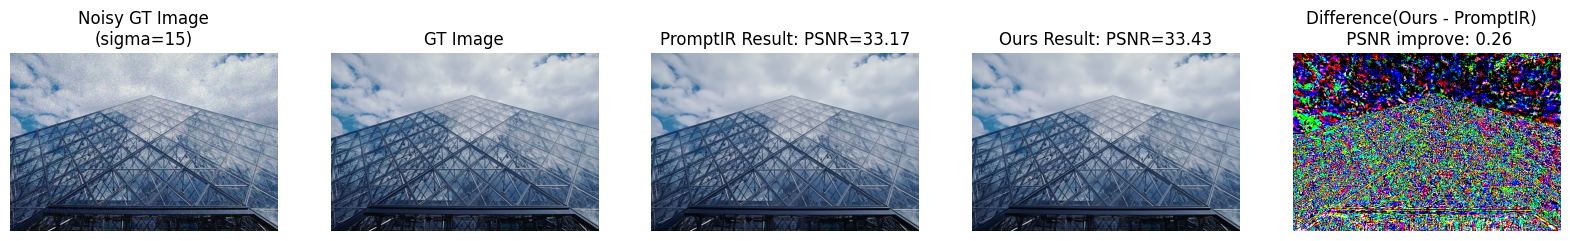

In [267]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image = "0046"
sigma = 15

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, sigma=25):
    # Generate Gaussian noise
    noise = np.random.normal(0, sigma, image.shape)
    # Add the noise to the image
    noisy_image = image + noise
    # Clip the values to be in the valid range
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

# Plot difference figure for better visualization
GT_image_path = f"/data/jiachen/all_in_one/Test/denoise/bsd68/{image}.png"
promptir_image_path = f"/home/jiachen/PromptIR/output_promptir/denoise/{sigma}/{image}.png"
promptxrestormer_image_path = f"/home/jiachen/PromptIR/output_promptxrestormer_epoch64/denoise/{sigma}/{image}.png"

# Load the images
GT_image = Image.open(GT_image_path)
promptir_image = Image.open(promptir_image_path)
promptxrestormer_image = Image.open(promptxrestormer_image_path)

# Convert images to numpy arrays for computation
GT_array = np.array(GT_image)
promptir_array = np.array(promptir_image)
promptxrestormer_array = np.array(promptxrestormer_image)

# Add Gaussian noise to the GT image
noisy_GT_array = add_gaussian_noise(GT_array, sigma=sigma)
noisy_GT_image = Image.fromarray(noisy_GT_array)

# Compute the absolute differences
diff_promptir_promptxrestormer = np.abs(promptir_array - promptxrestormer_array)

# Plotting
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Noisy GT image
axs[0].imshow(noisy_GT_image)
axs[0].set_title(f'Noisy GT Image\n(sigma={sigma})')
axs[0].axis('off')

# Original GT image
axs[1].imshow(GT_image)
axs[1].set_title('GT Image')
axs[1].axis('off')

# PromptIR image
baseline_psnr = baseline_denoise15_psnr_dict[image]
axs[2].imshow(promptir_image)
axs[2].set_title(f'PromptIR Result: PSNR={baseline_psnr:.02f}')
axs[2].axis('off')

# PromptXRestormer image
ours_psnr = promptxrestormer_denoise15_psnr_dict[image]
axs[3].imshow(promptxrestormer_image)
axs[3].set_title(f'Ours Result: PSNR={ours_psnr:.02f}')
axs[3].axis('off')

# Difference between PromptIR and PromptXRestormer
axs[4].imshow(diff_promptir_promptxrestormer)
axs[4].set_title('Difference(Ours - PromptIR)  \n PSNR improve: {:.02f}'.format(ours_psnr - baseline_psnr))
axs[4].axis('off')


plt.savefig(f"compare_denoise{sigma}.png", dpi = 300, bbox_inches = 'tight')


plt.show()

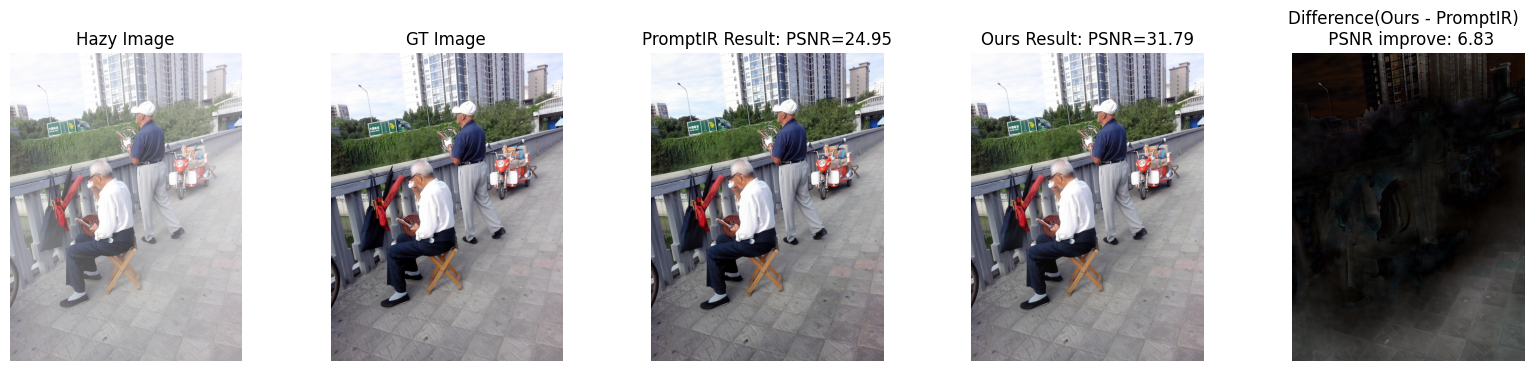

In [268]:
# visualization for dehaze
hazy_image_path = "/data/jiachen/all_in_one/Test/dehaze/input/1800_1_0.16.jpg"
GT_image_path = "/data/jiachen/all_in_one/Test/dehaze/target/1800.png"
promptir_image_path = "/home/jiachen/PromptIR/output_promptir/dehaze/1800_1_0.16.png"
promptxrestormer_image_path = "/home/jiachen/PromptIR/output_promptxrestormer_epoch64/dehaze/1800_1_0.16.png"

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the images
hazy_image = Image.open(hazy_image_path)
GT_image = Image.open(GT_image_path)
promptir_image = Image.open(promptir_image_path)
promptxrestormer_image = Image.open(promptxrestormer_image_path)

# Convert images to numpy arrays for computation
hazy_array = np.array(hazy_image)
GT_array = np.array(GT_image)
promptir_array = np.array(promptir_image)
promptxrestormer_array = np.array(promptxrestormer_image)

# Compute the absolute difference between PromptIR and PromptXRestormer images
diff_promptir_promptxrestormer = 3* np.abs(promptir_array.astype(int) - promptxrestormer_array.astype(int))

# Plotting
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Hazy image
axs[0].imshow(hazy_image)
axs[0].set_title('Hazy Image')
axs[0].axis('off')

# GT image
axs[1].imshow(GT_image)
axs[1].set_title('GT Image')
axs[1].axis('off')

# PromptIR image
baseline_psnr = baseline_dehaze_psnr_dict["1800_1_0.16"]
axs[2].imshow(promptir_image)
axs[2].set_title(f'PromptIR Result: PSNR={baseline_psnr:.02f}')
axs[2].axis('off')

# PromptXRestormer image
ours_psnr = promptxrestormer_dehaze_psnr_dict["1800_1_0.16"]    
axs[3].imshow(promptxrestormer_image)
axs[3].set_title(f'Ours Result: PSNR={ours_psnr:.02f}')
axs[3].axis('off')

# Difference between PromptIR and PromptXRestormer
axs[4].imshow(diff_promptir_promptxrestormer, cmap='gray')
axs[4].set_title('Difference(Ours - PromptIR)  \n PSNR improve: {:.02f}'.format(ours_psnr - baseline_psnr))
axs[4].axis('off')

plt.savefig("compare_dehaze.png", dpi = 300, bbox_inches = 'tight')
plt.show()